In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Chapter: ODE solvers for fast modelling:

Sample neuron modelling problem over $t \in [0, 10]$ with $h=0.005$ using a 5 step DOPRI54 Runge-Kutta method.

\begin{align*}
\texttt{Cython} &: \text{0.106 seconds (laptop)} \\
\texttt{Pytorch} &: \text{8.171 seconds (laptop)}\\
\texttt{Matlab} &: \text{8.205 seconds (laptop)}\\
\texttt{Matlab} &: \text{8.532 seconds (GPU SXM2SH)}\\
\texttt{PyTorch} &: \text{10.158 seconds (GPU SXM2SH)}\\
\texttt{NumPy} &: \text{11.177 seconds (laptop)}\\
\texttt{Matlab} &: \text{14.608 seconds (DTU)}\\
\end{align*}

Laptop: 2015 MacBook Pro 2,9 GHz Intel Core i5 ("laptop")


# Chapter: The theta neuron model
The theta neuron model is defined as follows:
\begin{align*}
\dot{\theta}&=(1-\cos \theta)+(1+\cos \theta) \cdot \iota \hspace{10mm} \theta \in S^1 \\
&=1-\cos \theta + \iota + \iota \cos \theta \\
&=(\iota + 1) + (\iota - 1) \cdot \cos \theta\\
\end{align*}

For $\iota > 0$, $\dot{\theta} > 0$ and $\theta$ moves continuously around the unit circle. Equilibria only exist for $\iota < 0$:
\begin{align*}
\iota + 1 &= (1 - \iota) \cdot \cos \theta\\
\theta^* &= \pm\arccos \left( \frac{\iota + 1}{1-\iota} \right) + 2\pi n\\
\end{align*}


For some of the extreme values of $\frac{\iota + 1}{1-\iota}$, we have that: 

\begin{align*}
\lim_{\iota \rightarrow -1} \theta^* &= \pm \arccos (0) + 2\pi n = \pm \frac{\pi}{2} + 2\pi n \\
\end{align*}

We can see the equilibrium points here, and below the saddle-node bifurcation

![Testing the model equilibria](Figures/ThetaModelEquilibriumPoints.png)


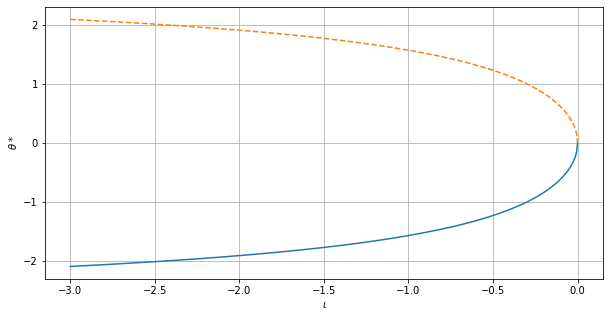

In [43]:
x = np.linspace(-3, 0, 500)
y = np.arccos((x + 1)/(1 - x))

plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(x,-y);
plt.plot(x,y, '--');
plt.xlabel(r"$\iota$")
plt.ylabel(r"$\theta*$");

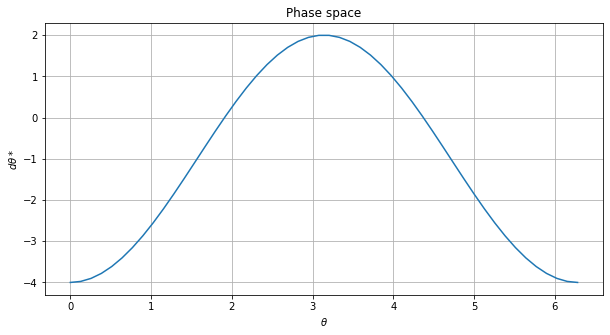

In [67]:
theta = np.linspace(0, 2*np.pi)
dtheta = (1 - np.cos(theta)) + (1 + np.cos(theta))*(-2)
plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(theta, dtheta);

plt.title('Phase space')
plt.xlabel(r"$\theta$")
plt.ylabel(r"$d\theta*$");

Concerning the stability:
\begin{align*}
\frac{d}{d\theta}\left((1-\cos \theta)+(1+\cos \theta) \cdot \iota \right) 
&= \sin \theta - \sin \theta \cdot \iota = (1- \iota)\sin \theta 
\end{align*}

For the equilibrium points that yields:
\begin{align*}
\frac{d\theta}{dt}(\theta^*) = (1 - \iota)\sin\left(\pm\arccos \left( \frac{\iota + 1}{1-\iota} \right) \right) 
&= \pm (1 - \iota) \cdot \sqrt{1 - \frac{\iota + 1}{1-\iota}}
= \pm (1 - \iota) \cdot \frac{2\sqrt{-\iota}}{1-\iota}
\end{align*}

For a current $-1 < \iota \leq 0$ this gives:
\begin{align*}
(1 - \iota) > 0  \hspace{5mm} \frac{2\sqrt{-\iota}}{1-\iota} > 0 \longrightarrow \frac{d\theta}{dt}(\theta^*) > 0
\end{align*}

So that we find an unstable fixpoint. For $\iota \leq -1$:
\begin{align*}
(1 - \iota) > 0  \hspace{5mm} \frac{2\sqrt{-\iota}}{1-\iota} > 0 \longrightarrow \frac{d\theta}{dt}(\theta^*) < 0
\end{align*}

So that we find a stable fixpoint (due to the minus sign).

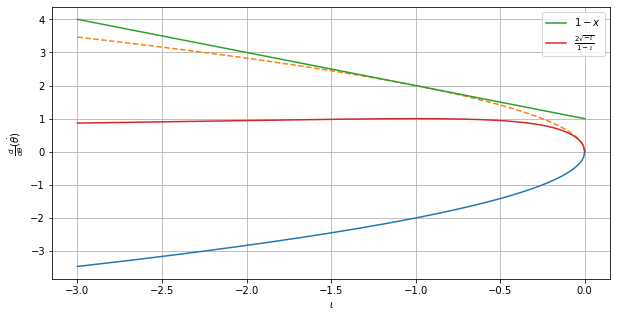

In [78]:
x = np.linspace(-3, 0, 500)
y = (1 - x)*(2*np.sqrt(-x)/(1-x))

plt.figure(figsize=(10,5))
plt.grid(True)

plt.plot(x,-y);
plt.plot(x,y, '--');
plt.xlabel(r"$\iota$")
plt.ylabel(r"$\frac{d}{d\theta}\left(\dot{\theta}\right)$")

plt.plot(x,(1 - x),label=r"$1 - x$")
plt.plot(x,(2*np.sqrt(-x)/(1-x)),label=r"$\frac{2\sqrt{-\iota}}{1-\iota}$");

plt.legend();

## QIF
The theta model is closely related to the QIF model:
\begin{align*}
\frac{dV}{dt} = V^2 + \iota
\end{align*}

We can easily transform back and forth between the two different models:
\begin{align*}
V &\equiv \tan\left( \frac{\theta}{2} \right) \\
\theta &\equiv \arctan(2 \cdot V)\\
\frac{dV}{dt} &= \frac{1}{2 \cos^2\left( \frac{\theta}{2} \right)}\frac{d\theta}{dt}
\end{align*}

Using the transformation we obtain:
\begin{align}
\dot{\theta}&=2\left(\cos ^{2}\left(\frac{\theta}{2}\right) \tan ^{2}\left(\frac{\theta}{2}\right)+\cos ^{2}\left(\frac{\theta}{2}\right) \iota \right) \\
&=2\left(\sin ^{2}\left(\frac{\theta}{2}\right)+\cos ^{2}\left(\frac{\theta}{2}\right) \iota \right)
\end{align}

Using $\cos ^{2}\left(\frac{\theta}{2}\right)=\frac{1+\cos \left(\frac{\theta}{2}\right)}{2}$ and $ \sin ^{2}\left(\frac{\theta}{2}\right)=\frac{1-\cos \left(\frac{\theta}{2}\right)}{2}$:
\begin{align*}
\dot{\theta}&=2\left(\frac{1-\cos \theta}{2}+\left(\frac{1+\cos \theta}{2}\right) \iota \right)\\
& = (1-\cos \theta)+(1+\cos \theta) \cdot \iota
\end{align*}

The reverse transformation can be obtained by taking the inverse.

## Frequency response 
See https://grey.colorado.edu/CompCogNeuro/index.php/CCNBook/Neuron/Frequency_Current_Curve and Gutkin2014


*In neuroscience, an F-I curve is the function that relates the net synaptic current flowing into a Neuron to its firing rate (′I′ is the measure for current, 'F' for firing rate.*


To compute the frequency-current response curve we start from the QIF model. Seperate the variables:

\begin{align*}
\frac{dV}{dt} &= V^2 + \iota \\
\frac{dV}{V^2 + \iota} &= dt \\
\end{align*}

Then integrate from the reset potential $V(0)$ at $t=0$ to the threshold potential $+\infty$ at $t = T$, as we want to find T, the time required to go from the reset voltage to the spike threshold. This is tractable for the regime where $\iota > 0$.

\begin{align*}
\int_{-\infty}^{+\infty} \frac{dv}{v^2 + \iota} &= \int_{0}^{T} dt = T \\
\end{align*}

Factoring out $\iota$ we can obtain a recognisable form, and find $T$:

\begin{align*}
T = \int_{V(0)}^{+\infty} \frac{\iota}{\left(\frac{v}{\sqrt{\iota}}\right)^2 + 1} dv 
\underset{x = \frac{v}{\sqrt{\iota}} \: \:dx = \frac{dv}{\sqrt{\iota}}}{=} 
\int_{\frac{V(0)}{\sqrt{\iota}}}^{+\infty} \frac{\iota}{x^2 + 1} dx 
= \frac{1}{\sqrt{\iota}} \arctan(x) \rvert_{\frac{V(0)}{\sqrt{\iota}}}^{+\infty} 
= \frac{1}{\sqrt{\iota}} \left( \frac{\pi}{2} - \arctan \left( \frac{V(0)}{\sqrt{\iota}} \right) \right)
\end{align*}

If then $V(0) = –\infty$ the time between spikes is:

\begin{align*}
T = \lim_{V(0) \rightarrow -\infty} \frac{1}{\sqrt{\iota}} \left( \frac{\pi}{2} - \arctan \left( \frac{V(0)}{\sqrt{\iota}} \right) \right) = \frac{1}{\sqrt{\iota}} \left( \frac{\pi}{2} - \left( - \frac{\pi}{2} \right) \right)
= \frac{\pi}{\sqrt{\iota}}
\end{align*}

So the frequency of oscillation is proportional to $\sqrt{\iota}$. This result is valid for the theta and QIF models.


We can measure the period between spikes in the model and verify this is correct

![Testing the model equilibria](Figures/ThetaNeuronResponseToCurrentPeriod.png)

As we approach the bifurcation point the speed/period of reaching the eq pts is infinite

## Solutions

The general solution during the oscillatory regime $\iota > 0$ is:

\begin{align*}
\int_{V(0)}^{V(t)} \frac{dv}{v^2 + \iota} 
= \int_{V(0)}^{V(t)} \frac{\iota}{\left(\frac{v}{\sqrt{\iota}}\right)^2 + 1} dv
\underset{x = \frac{v}{\sqrt{\iota}} \: \:dx = \frac{dv}{\sqrt{\iota}}}{=} 
\int_{\frac{V(0)}{\sqrt{\iota}}}^{\frac{V(t)}{\sqrt{\iota}}} \frac{\iota}{x^2 + 1} dx
= \frac{1}{\sqrt{\iota}} \arctan(x) \rvert_{\frac{V(0)}{\sqrt{\iota}}}^{\frac{V(t)}{\sqrt{\iota}}} 
= \frac{1}{\sqrt{\iota}} \left( \arctan \left( \frac{V(t)}{\sqrt{\iota}} \right) - \arctan \left( \frac{V(0)}{\sqrt{t}} \right) \right) = \int_0^t d\tau
\end{align*}

So 

\begin{align*}
t &= \frac{1}{\sqrt{\iota}} \left( \arctan \left( \frac{V(t)}{\sqrt{t}} \right) - \arctan \left( \frac{V(0)}{\sqrt{\iota}} \right) \right) \\
V(t) &= \sqrt{\iota} \tan \left( t\sqrt{\iota} + \arctan \left( \frac{V(0)}{\sqrt{\iota}} \right) \right) \longrightarrow V(0) = -\infty \\
V(t) &= \lim_{V(0) = -\infty} \sqrt{\iota} \tan \left( t\sqrt{\iota} + \arctan \left( \frac{V(0)}{\sqrt{\iota}} \right) \right) = \sqrt{\iota} \tan \left( t\sqrt{\iota} - \frac{\pi}{2} \right)\\
\end{align*}

We obtain: 

\begin{align*}
V(t) = - \sqrt{\iota} \cot \left( t\sqrt{\iota} \right)
\end{align*}

For the theta neuron model this would yield 

\begin{align*}
\theta(t) = 2\arctan \left( - \sqrt{\iota} \cot \left( t\sqrt{\iota} \right) \right)
\end{align*}

Remember that this is only true for $\theta(0) = -\pi$.
Is this a solution to the equations $\dot{\theta}=(1-\cos \theta)+(1+\cos \theta) \cdot \iota$?

\begin{align*}
\dot{\theta} &= \frac{d \theta(t)}{dt} = \frac{d}{dt} \left( 2\arctan \left( - \sqrt{\iota} \cot \left( t\sqrt{\iota} \right) \right) \right) \\
&= 2 \cdot \frac{1}{ \left(- \sqrt{\iota} \cot \left( t\sqrt{\iota} \right) \right)^2 + 1} \cdot
\frac{d}{dt} \left( - \sqrt{\iota} \cot \left( t\sqrt{\iota} \right) \right) \\
&= 2 \cdot \frac{1}{ \left(- \sqrt{\iota} \cot \left( t\sqrt{\iota} \right) \right)^2 + 1} \cdot 
\left( \frac{-\sqrt{\iota} \cdot \sqrt{\iota}}{\sin^2 \left( t\sqrt{\iota} \right)} \right) \\
&= \frac{-2 \cdot \iota}{ \iota \cot^2 \left( t\sqrt{\iota} \right)  + 1} \cdot 
\left( \frac{1}{\sin^2 \left( t\sqrt{\iota} \right)} \right) \\
&= \frac{-2 \cdot \iota}{ \iota \frac{\cos^2\left( t\sqrt{\iota} \right)}{\sin^2 \left( t\sqrt{\iota} \right)}  + 1} \cdot 
\left( \frac{1}{\sin^2 \left( t\sqrt{\iota} \right)} \right) \\
&= \frac{-2 \cdot \iota}{ \iota \cos^2\left( t\sqrt{\iota} \right)  + \sin^2\left( t\sqrt{\iota} \right)} 
\end{align*}

Using that $\frac{d \arctan(x)}{dx} = \frac{1}{x^2 + 1}$ and $\frac{d \cot(c\cdot x)}{dx} = \frac{c}{\sin^2(c\cdot x)}$.

Another interesting solution might be that $\iota = v$. Then:

\begin{align*}
\int_{V(0)}^{V(t)} \frac{dv}{v^2 + v} &= \int_{V(0)}^{V(t)} \frac{dv}{v \cdot ( v + 1)} \\
\frac{1}{v \cdot ( v + \alpha)} &= \frac{A}{v} + \frac{B}{( v + 1)} \\
1 &= A \cdot (v + 1) + B \cdot v  \longleftrightarrow A = 1 \: \& \: B = -1
\end{align*}


\begin{align*}
\int_{V(0)}^{V(t)} \frac{dv}{v + 1} - \int_{V(0)}^{V(t)} \frac{dv}{v} &= \left[\ln \lvert v + 1 \rvert \right]_{V(0)}^{V(t)} - \left[\ln \lvert v \rvert \right]_{V(0)}^{V(t)} \\
&= \ln \lvert V(0) + 1 \rvert - \ln \lvert V(t) + 1 \rvert  - \ln \lvert V(0) \rvert + \ln \lvert V(t) \rvert = t\\
e^t &= \frac{\lvert V(0) + 1 \rvert \cdot \lvert V(t) \rvert}{\lvert V(t) + 1 \rvert \cdot \lvert V(0) \rvert} = c \cdot \left| \frac{V(t)}{V(t) + 1} \right|\\
(V(t) + 1) e^t - V(t) e^t &= c\cdot V(t) - V(t) e^t \\
e^t &= V(t)(c - e^t) \\
V(t) &= \frac{e^t}{c - e^t}
\end{align*}

But we shall take $c=1$ as $V(0)$ is close to $V(0) + 1$. Then $\theta = 2 \arctan \left( \frac{e^t}{1 - e^t} \right)$.



Another interesting solution might be that $\iota = \alpha*v^2$. Then $\frac{dV}{dt} = V^2 + \alpha \cdot V^2$:

\begin{align*}
\int_{V(0)}^{V(t)} \frac{dv}{v^2} &= (1 + \alpha) \int_0^t d\tau = (1 + \alpha) t \\
-\frac{1}{v} \rvert_{V(0)}^{V(t)} &= - \frac{1}{V(t)} + \frac{1}{V(0)} = (1 + \alpha) t \\
V(t) &= -\frac{1}{(1 + \alpha) t - \frac{1}{V(0)}} = -\frac{1}{(1 + \alpha) t}
\end{align*}

Then $\theta = 2 \arctan \left( \frac{-1}{t + \alpha t} \right)$.

We only have one working initial condition ($\theta(0) = \pi$).

![Testing the model equilibria](Figures/ThetaNeuronAnalyticalSolution.png)

Using this expression with other functions like 

\begin{align*}
\int_{V(0)}^{V(t)} \frac{dv}{v^2 + \iota(t)} \text{ with } \iota(t) = a + b\cdot \sin(c\cdot t + d)
\end{align*}

is intractable...

THIS IS WRONG BECAUSE CHOOSING AN I IS CHANGING THE MODEL EQUATIONS. INSERTING V MAKES THE NEURON TALK TO ITSELF.

USUALLY NOT SEPERABLE, BUT IF I(t) IS QUASI-STATIONARY (SLOW) WITH RESPECT TO THE DYNAMICS OF THE NEURON, THEN BECAUSE OF THE TWO TIMING. THEN PRETEND THAT I IS A CONSTANT.

## Sensitivity to the input current:
We want to determine how sensitively the period $T$ depends in the input current $\iota$. See 'Introduction To Neuronal Modelling, 2017'.

We define the *condition number*, which measures by how much $T$ changes if $\iota$ is perturbed.
\begin{align*}
\kappa = \left| \frac{dT}{d\iota} \frac{\iota}{T} \right| = \left| \frac{dT / T}{d\iota / \iota}\right|
\end{align*}

*If $\kappa$ = 5 then a 1% change in $\iota$ will change a 5% change in $T$*.

For the theta neuron, use the fact that $\sqrt{\iota} = \frac{\pi}{T}$:
\begin{align*}
\kappa &= \left| -\frac{\pi}{2}\frac{1}{\iota^{3/2}} \frac{\iota}{T} \right| 
= \left| \frac{\pi}{2} \left(\frac{1}{\sqrt{\iota}}\right)^3 \frac{\iota}{T} \right| 
= \left| \frac{\pi}{2} \left(\frac{T}{\pi}\right)^3 \frac{\iota}{T} \right| 
= \frac{1}{2} \left|\left(\frac{T}{\pi}\right)^2 \cdot \left(\frac{\pi}{T}\right)^2 \right| = \frac{1}{2}
\end{align*}

Which means that a 1% increase in the current reduces the period by half a percent. 

![Testing the model equilibria](Figures/ThetaNeuronResponseToCurrent.png)

## Phase Resetting Curve?
*Gutkin: The infinitesimal PRC is the adjoint of solution and is given by:*

\begin{align*}
V(t) &= - \sqrt{\iota} \cot \left( t\sqrt{\iota} \right) \\
PRC(t) &= \frac{1}{d V / d t} = \frac{1}{2 \sqrt{I}}\left(1-\cos \left(2 \cdot t \cdot \sqrt{I} \right) \right)
\end{align*}

OSCILLATORS OSCILLATE CONTINUOUSLY, THIS IS RIGID OSCILLATION.
THETA NEURONS ARE QUIESCENT/STATIONARY
THE PHASE RESPONSE CURVE DESCRIBES HOW THE PHASE OF AN OSCILLATOR CHANGES WHEN PERTURBED BY OTHER OSCILLATORS.

MIGHT BE STATIC FOR A RIGID OSCILLATOR.

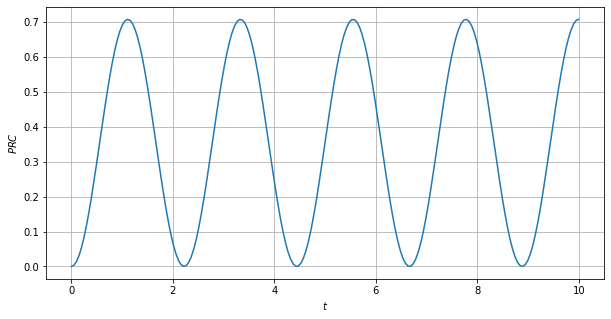

In [50]:
t = np.linspace(0,10, 200)
I = 2
PRC = 1/(2*np.sqrt(I)) * (1 - np.cos(2*t*np.sqrt(I)))

plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(t, PRC);
plt.xlabel(r"$t$")
plt.ylabel(r"$PRC$");

# Chapter: Networks of Theta neurons
Construct networks of theta neurons defined by their adjacency matrix $A_{ij}$ and their threshold $\eta$:

\begin{align*}
\dot{\theta}_{i} &=\left(1-\cos \theta_{i}\right)+\left(1+\cos \theta_{i}\right) \cdot\left[\eta_{i}+\kappa I_{i}(t)\right] \\ 
I_{i}(t) &=\frac{1}{\langle k\rangle} \sum_{j=1}^{N} A_{i j} \cdot \mathcal{P}_{n}\left(\theta_{j}\right) \\
\mathcal{P}_n(\theta)&=a_{n}(1-\cos \theta)^{n}
\end{align*}

Measure synchrony with the order parameter:
\begin{align*}
Z(t)=\frac{1}{N} \sum_{j=1}^{N} e^{\mathrm{i} \theta_{j}}
\end{align*}

UNIDIRECTIONAL NETWORK ADJACENCY IN NEURONS?

## The Ott-Antonsen reduced manifold:
Hypothesis: an order parameter of the mean field in the continuum limit
\begin{align*}
\bar{Z}(t)=\sum_{k^{\prime}} \frac{P\left(k^{\prime}\right)}{N} \int_{\mathbb{R}} \int_{-\pi}^{\pi} f\left(\vartheta, \eta^{\prime} \mid k, t\right) e^{\mathrm{i} \vartheta} d \vartheta d \eta^{\prime}
\end{align*}

\begin{align}
\frac{\partial z(k, t)}{\partial t} &= - \mathrm{i} \frac{(z(k, t)-1)^{2}}{2} + \frac{(z(k, t)+1)^{2}}{2} \cdot \iota  \label{eq:MFRpart1}\\ 
\iota &= -\Delta + \mathrm{i} \eta_{0} + \mathrm{i} \kappa \cdot H_{n}(k, t) \label{eq:MFRpart2}\\
H_{n}(k, t) &= \frac{a_{n}}{\langle k\rangle}\sum_{k^{\prime}} P(k^{\prime}) \: a(k^{\prime}, k) \label{eq:MFRpart3}\\ 
&\times\left[A_{0}+\sum_{p=1}^{n} A_{p}\left(z\left(k^{\prime}, t\right)^{p}+z^{*}\left(k^{\prime}, t\right)^{p}\right)\right] \nonumber
\end{align}

Following ErikMartens2020, $H_2(k,t)$ is computed as:

\begin{align}
H_{2}(k, t) &= \frac{1}{\langle k\rangle}\sum_{k^{\prime}} P(k^{\prime}) \: a(k^{\prime}, k) \cdot\left[1+\frac{z(k^{\prime},t) + \bar{z}(k^{\prime},t)}{6} -\frac{4}{3} \operatorname{Re}(z(k^{\prime},t))\right] 
\end{align}

So now we can measure:
\begin{align*}
\bar{Z}(t)=\frac{1}{N} \sum_{k} P(k) z(k, t)
\end{align*}

The OA manifold brings us one step closer to reducing the computational irreducibility. That is why I think it is so important.

# Chapter: Synaptic Plasticity
Synaptic plasticity is added to the different models by either convoluting in- and output signals of a neuron, or by using an instantanious scheme, or just from the network architecture. There are many possibilitties.


##  'Adaptive Theta Neurons' - Gutkin2014
Add an input to the current that is time-dependant:

\begin{align*}
\dot{\theta}&=(1-\cos \theta)+(1+\cos \theta) \cdot \left(\iota + \sum g_{i j} s_{i j}\right) \\
\end{align*}

where $g_{ij}$ models the synaptic weight (positive for excitatory, negative for inhibitory)
\begin{align*}
s_{i,j}^{\prime}(t)=-\frac{s_{i j}}{\tau_{s}}+\left(1-s_{i j}\right) e^{-\rho\left(1-\cos \left(\theta_{i}-\theta_{\text {thresh }}\right)\right)}
\end{align*}

*Where $\rho$ is roughly speaking the rise time of the synapse* (?) and $\tau_s$ is the synaptic decay time scale.

Or we can incorporate slower adaption current:
\begin{align*}
\theta^{\prime}&=(1-\cos \theta)+(1+\cos \theta)(\iota -\mu z)
\end{align*}

with $\mu$ the strength of the adaptation current.

\begin{align*}
\tau_{z} z^{\prime}&=D(\theta)(1-z)-z \\
D(\theta)&=\kappa \exp \{ -\mathrm{C}\left(1-\cos \left(\theta-\theta_{z}\right)\right) \}
\end{align*}

$\theta_z$ controls whether the adaptation current is voltage dependant or spike dependant.

## Hebbian learning - Kempter1999

Convolution of incoming spikes and learning window over a certain period $T$ for neuron $i$:

\begin{align*}
\Delta A_{ij}(t)=& \eta \int_{t}^{t+T} \left(w^{\mathrm{in}} S_{j}^{\mathrm{in}}\left(t^{\prime}\right)+w^{\mathrm{out}} S_i^{\mathrm{out}}\left(t^{\prime}\right)\right) d t^{\prime}\\ 
&+\eta \int_{t}^{t+T} \int_{t}^{t+\mathcal{T}} W\left(t^{\prime \prime}-t^{\prime}\right) S_{j}^{\mathrm{in}}\left(t^{\prime \prime}\right) S_i^{\mathrm{out}}\left(t^{\prime}\right) d t^{\prime \prime}  d t^{\prime} 
\end{align*}

$\eta$ is the learning rate, $w^{\mathrm{in}}$ and $w^{\mathrm{out}}$ are the weights on the input- and output spike trains $S^{\mathrm{in}}$ and $S^{\mathrm{out}}$. $W$ is the learning window. Averaged uantities are used to reduce noise:

\begin{align*}
\frac{d}{d t} A_{ij}(t) = \eta \cdot \left( w^{\mathrm{in}} \langle S_j \rangle^{\mathrm{in}}(t)+w^{\mathrm{out}} \langle S_i \rangle^{\mathrm{out}}(t)+\int_{-\infty}^{\infty} W(s) C_{ij}(s ; t) d s \right)
\end{align*}

with $C_{ij}$ the averaged convolution of incoming and outgoing spike trains.


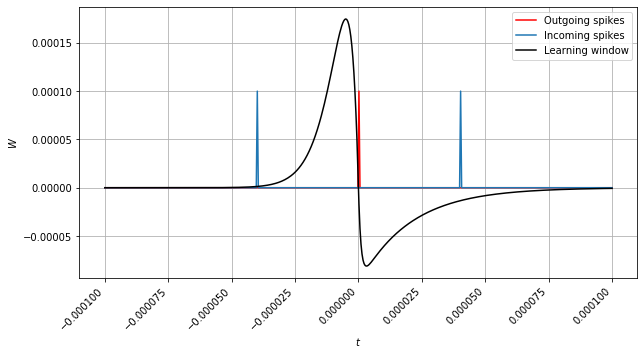

In [29]:
def Window(t):
    learning_rate = 10.0e-5
    t_syn = 5.0e-6
    t_pos = 1.0e-6
    t_neg = 20.0e-6
    eps = 1.0e-9
    
    W = np.zeros(t.shape)
    t_neg_idx = t <= 0
    t_pos_idx = t > 0
    W[t_neg_idx] = np.exp(t[t_neg_idx]/t_syn + eps)*((1-t[t_neg_idx]/t_pos) - (1-t[t_neg_idx]/t_neg))
    W[t_pos_idx] = np.exp(-t[t_pos_idx]/t_pos + eps) - np.exp(-t[t_pos_idx]/t_neg + eps)
    return learning_rate * W

t = np.linspace(-1.0e-4, 1.0e-4, 500)
W = Window(t)

S_i = np.zeros(t.shape)
S_i[250] = 1.0e-4

S_j = np.zeros(t.shape)
S_j[150] = S_j[350] = 1.0e-4

plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(t,S_i,'r',label="Outgoing spikes")
plt.plot(t,S_j,label="Incoming spikes")
plt.plot(t,W,'k',label="Learning window")

plt.xticks(rotation=45, ha="right")
plt.xlabel(r"$t$")
plt.ylabel(r"$W$")

plt.legend();


## Social Group Dynamics - Barabasi et al 

Link weights are adapted to events occuring in time, associated with a certain weight $w_i$

\begin{align*}
w_{a, b}(t)=& \sum_{i}\left[w_{i} \Theta\left(t-t_{i}\right) \exp \left(-\lambda_{+}\left(t-t_{i}\right) / w_{i}\right) +w_{i} \Theta\left(t_{i}-t\right) \exp \left(-\lambda_{-}\left(t_{i}-t\right) / w_{i}\right)\right] \\
\Theta(t) &=
    \begin{cases}
      0, & \text{if}\ t \leq 0 \\
      1, & \text{otherwise}
    \end{cases}
\end{align*}


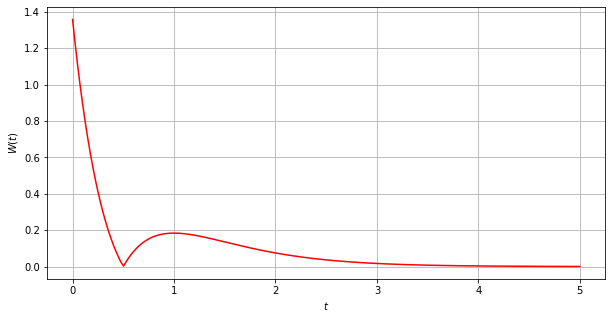

In [42]:
t = np.linspace(0, 5, 200)
t_i = 0.5
l = 2

th_1 = t-t_i
th_1[th_1 < 0] = 0

th_2 = t_i-t
th_2[th_2 < 0] = 0

f = th_1*np.exp(-l*(t-t_i)) + th_2*np.exp(-l*(t-t_i))

plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(t,f,'r',label="Outgoing spikes")
plt.xlabel(r"$t$")
plt.ylabel(r"$W(t)$");

## Bianconi-Barabasi model 

Implements *fitness* of each node to model future relations within the network. Based on the scale-free property of *preferential attachment*. The probability of a new node connecting to node $i$ depends on its fitness $\eta$, its degree $k$ and the average fitness and degree of the network:

\begin{align}
\Pi_{i}=\frac{\eta_{i} k_{i}}{\sum_{j} n_{j} k_{j}}
\end{align}

This is adaptation in the sense of new nodes appearing. Then what about changing fitness over time? Or say that

\begin{align}
k_{i} = \sum_j \frac{1}{k_j} \eta_i + \frac{k_j - 1}{k_j} k_{i}
\end{align}


## Random Threshold Networks

A network of $N$ randomly interconnected nodeswith a binary link $A_{ij} = \{0, 1\}$.

\begin{align*}
    A_{ij}(t+1) = \sum_{j=1}^N c_{i,j} A_{ij}(t) + h_i
\end{align*}

with $c_{ij} \sim \mathcal{B}(1, 1/2)$, and $h_i \leq 0$ to make activations more difficult. This only works in discrete time. The model is made to find attractors (or limit cycles) in binary networks but can be adapted to my approach by setting a time delay. 

![](https://cdn.mathpix.com/snip/images/FPcJgsi3Zc0SjykkwdS6O8fLlCQj0CP7z-iMLmvZ6Z4.original.fullsize.png)

$p$ is the probability of removing a degree of the current node in the case that an attractor is not reached. A version with simulated annealing is also discussed.

## Enhancing synchronization based on complex gradient networks - Wang et al 2007

For systems like

\begin{align*}
\dot{\mathbf{x}}_{i}=\mathbf{F}\left(\mathbf{x}_{i}\right)- K \sum_{j=1}^{N} A_{i, j} \mathbf{H}\left(\mathbf{x}_{j}\right)
\end{align*}

Updates come from

\begin{align*}
\Delta A_{i, j}=\frac{1}{C_{i, j}}\left(k_{i}^{\beta} \sum_{l \in V_{i}} k_{l}^{\beta}-k_{j}^{\beta} \sum_{l \in V_{j}} k_{l}^{\beta}\right)
\end{align*}

with $\beta$ a control parameter. Important aspect in this paper: one wants to improve the synchronisability of the network!

## Problem:

All these approaches yield a continuous update of the connection, eg $A_{ij} \in \mathrm{R}$.

* Node degree $k_i$ is not an integer anymore. What is the difference between one connection with strength 5 and 5 connections with strength 1? Restrict $k_i$ to [0,1]?
* Set a threshold on the current value of the weight, so that we can work with the continuous implementations?.
* Extend the OA manifold for $A_{ij} \in \mathrm{R}$ with $I_{i}(t)=\frac{1}{\langle k\rangle} \sum_{j=1}^{N} K_{ij} A_{i j} \cdot \mathcal{P}_{n}\left(\theta_{j}\right)$. Why would that be a problem?
* How to measure changing degree distribution over time?

COLOUR CODE THE PROBABILITY, T ON XAXIS AND DEGREE ON Y